In [19]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [20]:
#Read the properties files of 2016
properties = pd.read_csv('../data/properties.csv', header=0, index_col=0)
properties = properties.sort_values(by='Price ($)', ascending=False)
properties.head(5)

,Address,AreaName,Price ($),lat,lng
36924,"4740 HIGH RD Ottawa, ON",Greenbelt,32500000,45.295937,-75.613808
5798,"10 HIGH POINT RD Toronto, ON",Bridle Path,26800000,43.735306,-79.372612
28796,"51 -75 BRADFORD ST Barrie, ON",Barrie,23200000,44.383312,-79.693642
79960,"16 High Point Rd Toronto, ON",Bridle Path,18800000,43.734344,-79.371315
98496,"12441 MISSISSAUGA RD Caledon, ON",Caledon,16000000,43.703365,-79.878990


In [21]:
# Check columns
properties.columns

Index(['Address', 'AreaName', 'Price ($)', 'lat', 'lng'], dtype='object')

In [22]:
# Check data types
properties.dtypes

Address       object
AreaName      object
Price ($)      int64
lat          float64
lng          float64
dtype: object

In [23]:
# Check numm values
properties.isnull().sum()

Address        0
AreaName     483
Price ($)      0
lat            0
lng            0
dtype: int64

In [24]:
#Total data points
properties.shape[0]

25351

In [25]:
#Descriptive statistics
properties.describe()

,Price ($),lat,lng
count,2.535100e+04,25351.000000,25351.000000
mean,5.645438e+05,37.326614,-85.218379
std,8.475962e+05,82.858347,73.093572
min,0.000000e+00,-999.000000,-999.000000
25%,2.199000e+05,43.401087,-80.308159
50%,3.719000e+05,43.715977,-79.503342
75%,6.199000e+05,44.466711,-79.107326
max,3.250000e+07,53.851017,1.074519


In [8]:
#This cuts the values into 3 equal buckets 
properties['Qs']=pd.qcut(properties['Price ($)'], 3, labels=False)
properties.head()

,Address,AreaName,Price ($),lat,lng,Qs
36924,"4740 HIGH RD Ottawa, ON",Greenbelt,32500000,45.295937,-75.613808,2
5798,"10 HIGH POINT RD Toronto, ON",Bridle Path,26800000,43.735306,-79.372612,2
28796,"51 -75 BRADFORD ST Barrie, ON",Barrie,23200000,44.383312,-79.693642,2
79960,"16 High Point Rd Toronto, ON",Bridle Path,18800000,43.734344,-79.371315,2
98496,"12441 MISSISSAUGA RD Caledon, ON",Caledon,16000000,43.703365,-79.878990,2


In [9]:
new_properties = properties[properties['lat'].between(properties['lat'].quantile(0.15), properties['lat'].quantile(.85))]
new_properties

,Address,AreaName,Price ($),lat,lng,Qs
5798,"10 HIGH POINT RD Toronto, ON",Bridle Path,26800000,43.735306,-79.372612,2
28796,"51 -75 BRADFORD ST Barrie, ON",Barrie,23200000,44.383312,-79.693642,2
79960,"16 High Point Rd Toronto, ON",Bridle Path,18800000,43.734344,-79.371315,2
98496,"12441 MISSISSAUGA RD Caledon, ON",Caledon,16000000,43.703365,-79.878990,2
77248,"14 The Bridle Path Toronto, ON",Bridle Path,15300000,43.739182,-79.379913,2
...,...,...,...,...,...,...
19167,"1853 UPPER JAMES Street Hamilton, ON",Hamilton,0,43.194717,-79.896156,0
124483,"2373 KING Street Hamilton, ON",Glenview East,0,43.228985,-79.793358,0
36866,"1685 MAIN Street Hamilton, ON",Ainslie Wood West,0,43.256721,-79.934456,0
36859,"2160 HEADON Road Burlington, ON",Burlington,0,43.378422,-79.816528,0


In [10]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [14]:
#Blank street map of the Southern region of Ontario (shp file)
street_map = gpd.read_file('../data/FME_b03896508394946/obm_OBMUSER_Municipal_upper_tier_poly.shp')

<AxesSubplot:>

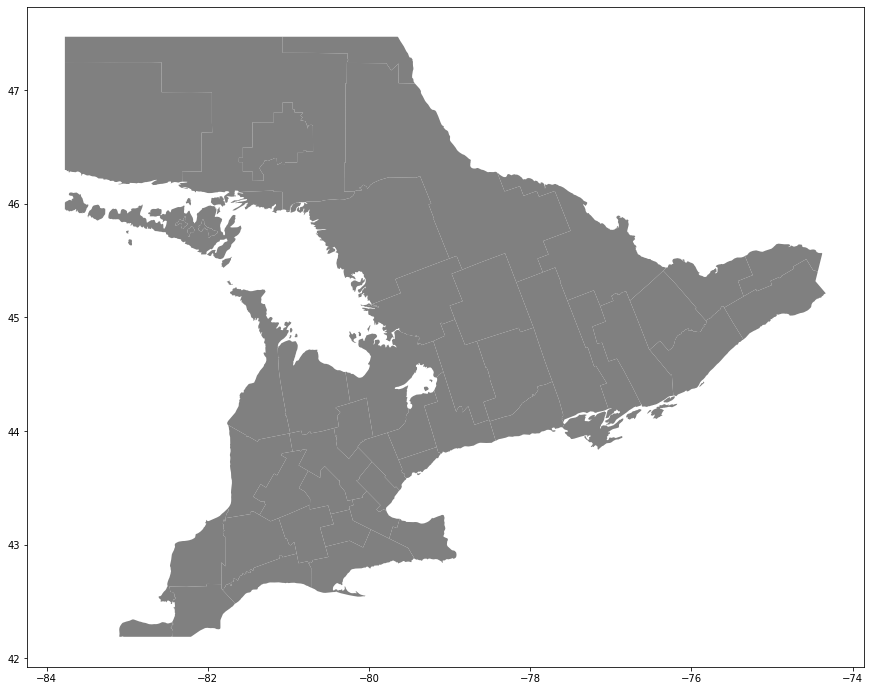

In [15]:
#Plot the street map 
fig,ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, color='grey')

In [16]:
#Create the logitude and latitude zip
geometry = [Point(xy) for xy in zip(new_properties['lng'], new_properties['lat'])]
crs = {'init': 'epsg:4326'}

In [17]:
#Use the address of the properties to build to get the longitude and latitude to create the table
geo_properties = gpd.GeoDataFrame(new_properties, crs=crs, geometry = geometry)
geo_properties.head()

/Users/abdirahmanali/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Address,AreaName,Price ($),lat,lng,Qs,geometry
5798,"10 HIGH POINT RD Toronto, ON",Bridle Path,26800000,43.735306,-79.372612,2,POINT (-79.37261 43.73531)
28796,"51 -75 BRADFORD ST Barrie, ON",Barrie,23200000,44.383312,-79.693642,2,POINT (-79.69364 44.38331)
79960,"16 High Point Rd Toronto, ON",Bridle Path,18800000,43.734344,-79.371315,2,POINT (-79.37131 43.73434)
98496,"12441 MISSISSAUGA RD Caledon, ON",Caledon,16000000,43.703365,-79.878990,2,POINT (-79.87899 43.70337)
77248,"14 The Bridle Path Toronto, ON",Bridle Path,15300000,43.739182,-79.379913,2,POINT (-79.37991 43.73918)


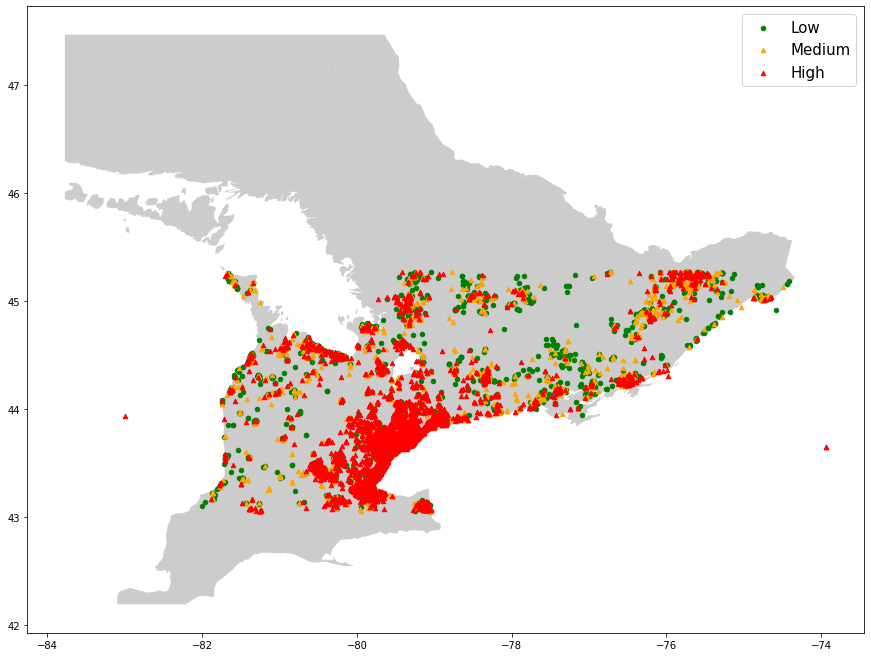

In [18]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha = 0.4, color='grey')

#Properties that have low prices and are colored as green
geo_properties[geo_properties['Qs']==0].plot(ax=ax, markersize=20, color='green', marker='o', label='Low')

#Properties that have medium prices and are colored as orange
geo_properties[geo_properties['Qs']==1].plot(ax=ax, markersize=20, color='orange', marker='^', label='Medium')

#Properties that have high prices and are colored as red
geo_properties[geo_properties['Qs']==2].plot(ax=ax, markersize=20, color='red', marker='^', label='High')

#Plot
plt.legend(prop={'size':15})

### Looking at the map, we see that majority of the high prices are in the southern regions of Ontario (primarly in the Toronto region). We see a lot of low home sales outside of the Toronto region.